In [1]:
%matplotlib inline


import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from warnings import filterwarnings
filterwarnings('ignore')

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [36]:
features = pd.read_csv('DengueProject/dengue_features_train.csv')
labels = pd.read_csv('DengueProject/dengue_labels_train.csv')

labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [38]:
features['total_cases'] = labels['total_cases']
# Seperate data for San Juan

sjf = features[features['city']=='sj']
iqf = features[features['city']=='iq']


sjl = labels[labels['city']=='sj']
iql = labels[labels['city']=='iq']

sjl.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [28]:
sjf.fillna(method='ffill', inplace=True)
iqf.fillna(method='ffill', inplace=True)
sjf.set_index('week_start_date', drop = True, inplace = True)
iqf.set_index('week_start_date', drop = True, inplace = True)

In [29]:
sjf.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [40]:
print('San Juan')
print('mean: ', sjl.mean()[2])
print('var :', sjl.var()[2])

print('\nIquitos')
print('mean: ', iql.mean()[2])
print('var :', iql.var()[2])

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.8955239365642


Text(0.5,1,'SJ Variable Correlations')

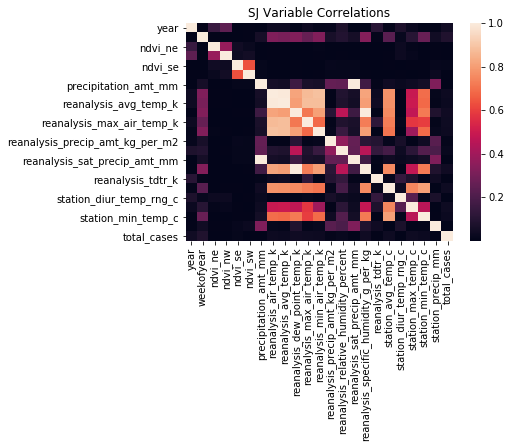

In [6]:

sjCor = sjf.corr()**2
sns.heatmap(sjCor)
plt.title('SJ Variable Correlations')


Text(0.5,1,'IQ Variable Correlations')

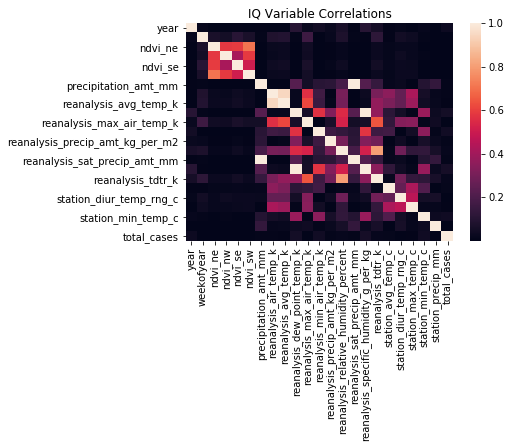

In [7]:
##sj_corr_heat = sns.heatmap(sj_correlations**2)
iqCor = iqf.corr()**2
sns.heatmap(iqCor)
plt.title('IQ Variable Correlations')

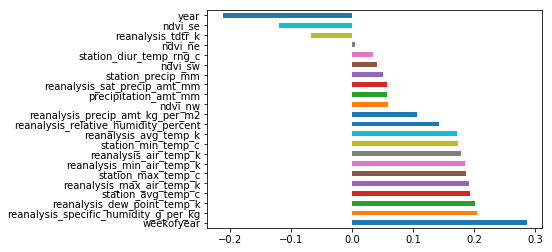

In [8]:
# San Juan
(sjf.corr()
     .total_cases
     .drop('total_cases') 
     .sort_values(ascending=False)
     .plot
     .barh())

Text(0.5,1,'IQ Variable Correlations')

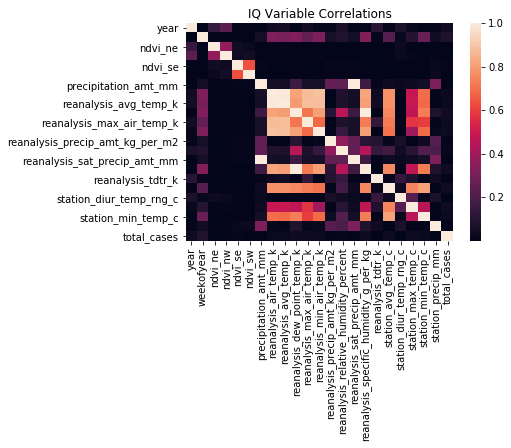

In [9]:
sjfCor1 = sjf.shift(10).corr()**2
sns.heatmap(sjfCor1)
plt.title('IQ Variable Correlations')



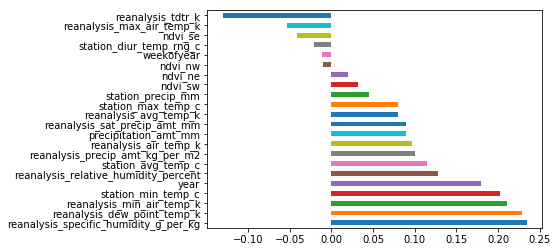

In [10]:
(iqf.corr()
     .total_cases
     .drop('total_cases') 
     .sort_values(ascending=False)
     .plot
     .barh())

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()
Xs = ss.fit_transform(sjf[sjf.columns[7:23]])
df_sj_s = pd.DataFrame(Xs, columns = sjf.columns[7:23], index=sjf.index)

df_sj_s['weekofyear'] = sjf['weekofyear']
df_sj_s['total_cases'] = sjf['total_cases']
df_sj_s['year'] = sjf['year']

#Standardize IQ
ss = StandardScaler()
Xs = ss.fit_transform(iqf[iqf.columns[7:23]])
df_iq_s = pd.DataFrame(Xs, columns = iqf.columns[7:23], index=iqf.index)
df_iq_s['weekofyear'] = iqf['weekofyear']
df_iq_s['total_cases'] = iqf['total_cases']
df_iq_s['year'] = iqf['year']

df_sj_s.head()

,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,weekofyear,total_cases,year
week_start_date,,,,,,,,,,,,,,,,,,,
1990-04-30,-0.513013,-1.282015,-1.253898,-1.714497,-1.265623,-1.079864,0.045021,-1.538475,-0.513013,-1.624972,0.228762,-1.100409,0.173508,-1.278687,-1.723054,-0.367775,18,4,1990
1990-05-07,-0.279993,-0.765638,-0.679726,-0.734948,-0.391773,-0.693609,-0.350886,-0.355236,-0.279993,-0.753081,-0.287676,-0.201443,-0.459811,0.059942,-0.261722,-0.620780,19,5,1990
1990-05-14,-0.017398,-0.304710,-0.322333,0.210006,-0.709537,0.001651,-0.121114,1.029432,-0.017398,0.192993,-0.431131,-0.201443,-0.322877,0.350949,0.136822,0.500648,20,4,1990
1990-05-21,-0.447140,-0.138360,-0.035247,0.130805,0.005432,-0.230103,-0.464646,0.522269,-0.447140,0.080343,-0.172912,0.333897,0.019457,0.991163,0.468943,-0.778054,21,3,1990
1990-05-28,-0.622801,0.291378,0.322146,0.456714,0.402637,0.156153,-0.512515,0.558586,-0.622801,0.424704,1.003419,1.374273,3.134700,1.980584,0.867488,-0.716512,22,6,1990


Text(0.5,0,'Week of Year')

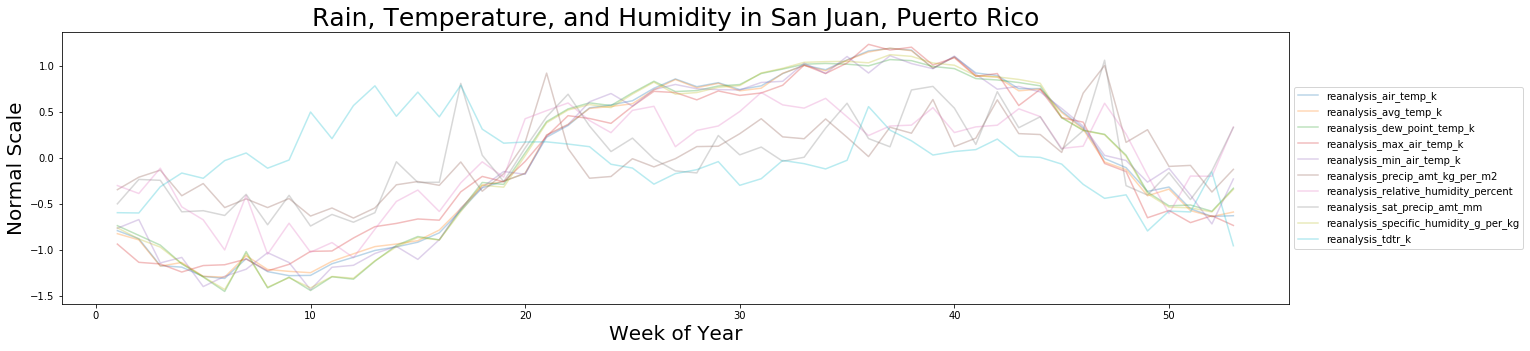

In [14]:
for i in (df_sj_s.columns[1:11]):
    df_sj_s.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (22, 5))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('Rain, Temperature, and Humidity in San Juan, Puerto Rico', size = 25)
plt.ylabel('Normal Scale', size = 20)
plt.xlabel('Week of Year', size = 20)

Text(0,0.5,'Number of Cases')

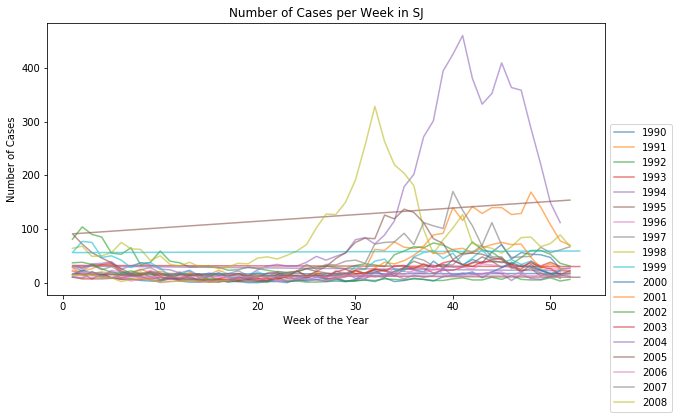

In [15]:
sj = labels[labels['city'] == 'sj']


fig,ax = plt.subplots(figsize=(10,5))
for i in set(sj['year']):
    df = sj[sj['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .6)
    
plt.legend(set(sj['year']), loc='center left', bbox_to_anchor=(1, .1))

plt.title('Number of Cases per Week in SJ')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

Text(0.5,0,'Week of Year')

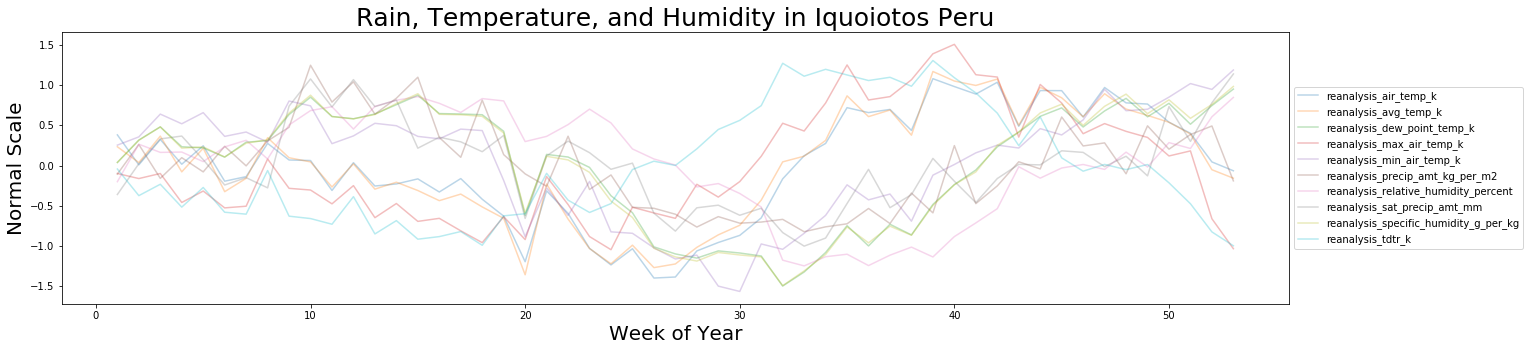

In [16]:
for i in (df_iq_s.columns[1:11]):
    df_iq_s.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (22, 5))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('Rain, Temperature, and Humidity in Iquoiotos Peru', size = 25)
plt.ylabel('Normal Scale', size = 20)
plt.xlabel('Week of Year', size = 20)

Text(0,0.5,'Number of Cases')

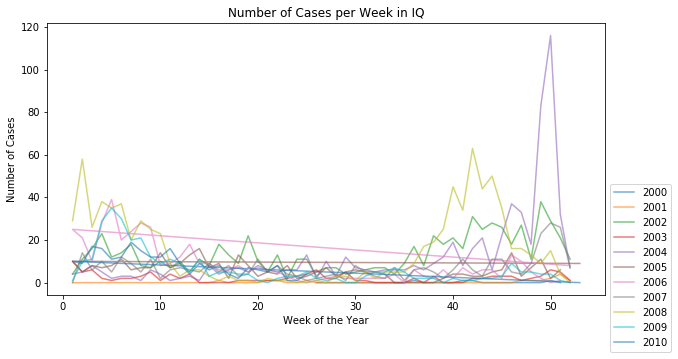

In [17]:
iq = labels[labels['city'] == 'iq']

fig,ax = plt.subplots(figsize=(10,5))
for i in set(iq['year']):
    df = iq[iq['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .6)
    
plt.legend(set(iq['year']), loc='center left', bbox_to_anchor=(1, .1))

plt.title('Number of Cases per Week in IQ')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

Text(0,0.5,'Number of Cases')

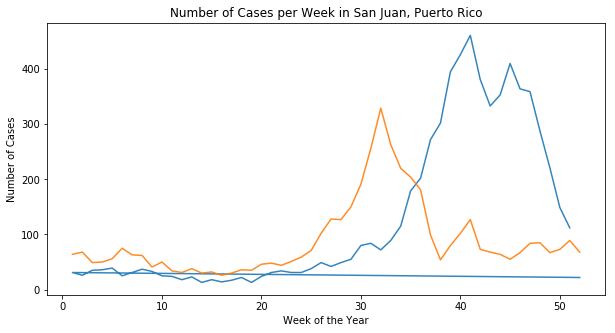

In [18]:
fig,ax = plt.subplots(figsize=(10,5))
for i in set(sj['year']):
    if (i== 1994):
        df = sj[sj['year'] == i]
        df.set_index('weekofyear', drop = True, inplace = True)
        plt.plot(df['total_cases'], alpha = .9)
    if (i== 1998):
        df = sj[sj['year'] == i]
        df.set_index('weekofyear', drop = True, inplace = True)
        plt.plot(df['total_cases'], alpha = .9)
    

plt.title('Number of Cases per Week in San Juan, Puerto Rico')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

Text(0.5,0,'Week of Year')

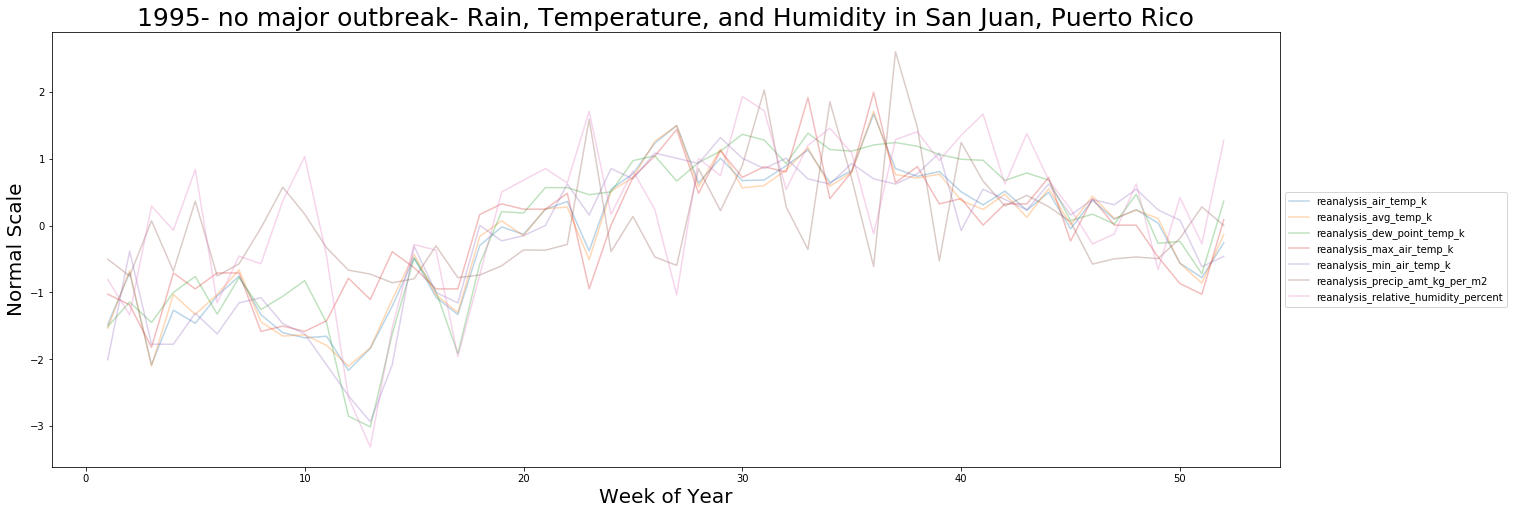

In [19]:
for i in (df_sj_s.columns[1:8]):
    df = df_sj_s[df_sj_s['year']==1995]
    df.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (22, 8))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('1995- no major outbreak- Rain, Temperature, and Humidity in San Juan, Puerto Rico', size = 25)
plt.ylabel('Normal Scale', size = 20)
plt.xlabel('Week of Year', size = 20)



Text(0.5,0,'Week of Year')

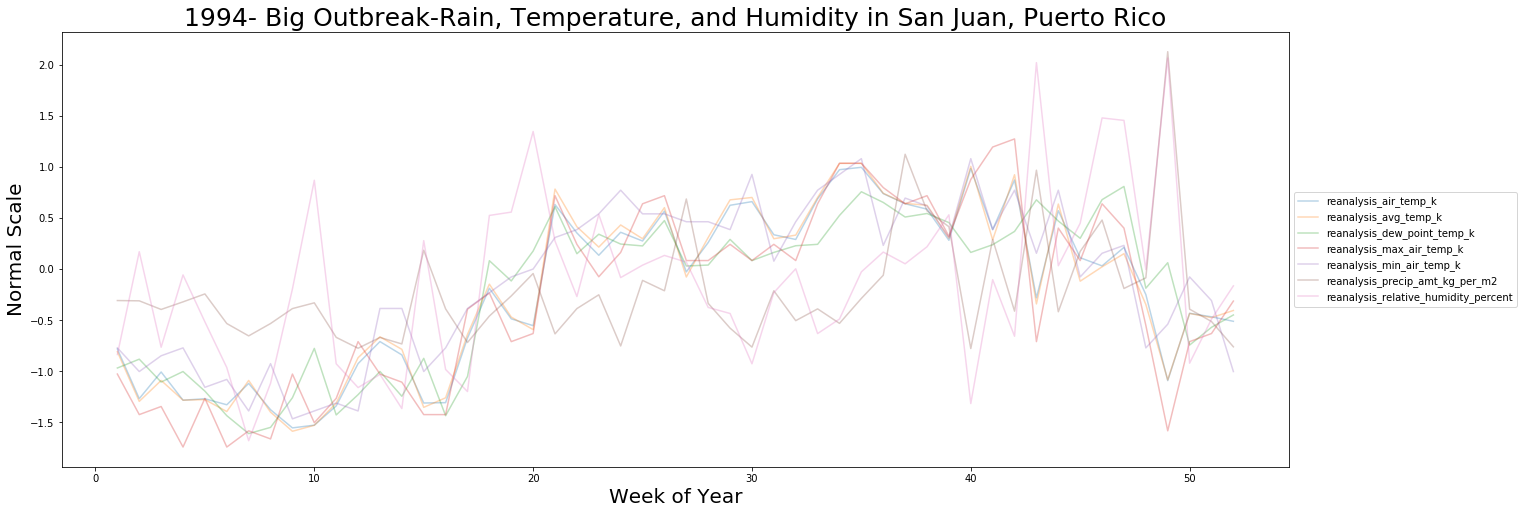

In [20]:
for i in (df_sj_s.columns[1:8]):
    df = df_sj_s[df_sj_s['year']==1994]
    df.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (22, 8))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('1994- Big Outbreak-Rain, Temperature, and Humidity in San Juan, Puerto Rico', size = 25)
plt.ylabel('Normal Scale', size = 20)
plt.xlabel('Week of Year', size = 20)


Text(0,0.5,'Number of Cases')

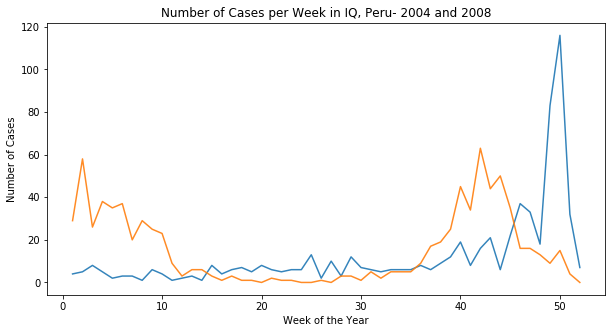

In [22]:
fig,ax = plt.subplots(figsize=(10,5))
for i in set(iq['year']):
    if (i== 2004):
        df = iq[iq['year'] == i]
        df.set_index('weekofyear', drop = True, inplace = True)
        plt.plot(df['total_cases'], alpha = .9)
    if (i== 2008):
        df = iq[iq['year'] == i]
        df.set_index('weekofyear', drop = True, inplace = True)
        plt.plot(df['total_cases'], alpha = .9)
    

plt.title('Number of Cases per Week in IQ, Peru- 2004 and 2008')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')



Text(0.5,0,'Week of Year')

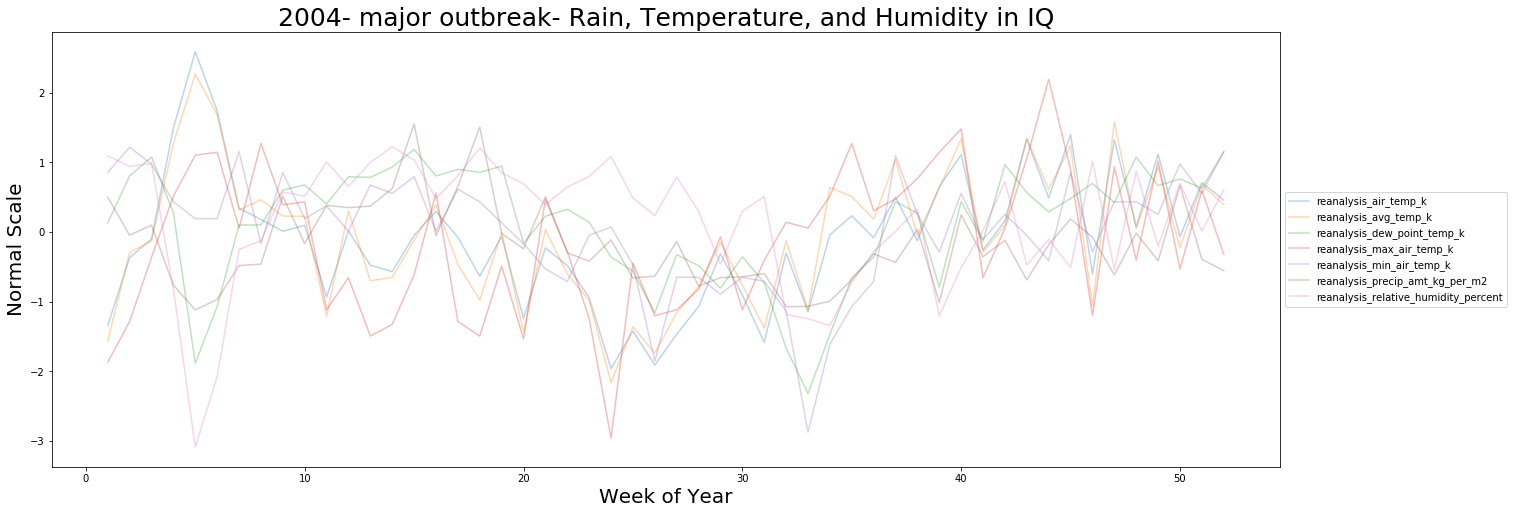

In [23]:
for i in (df_iq_s.columns[1:8]):
    df = df_iq_s[df_iq_s['year']==2004]
    df.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (22, 8))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('2004- major outbreak- Rain, Temperature, and Humidity in IQ', size = 25)
plt.ylabel('Normal Scale', size = 20)
plt.xlabel('Week of Year', size = 20)



Text(0.5,0,'Week of Year')

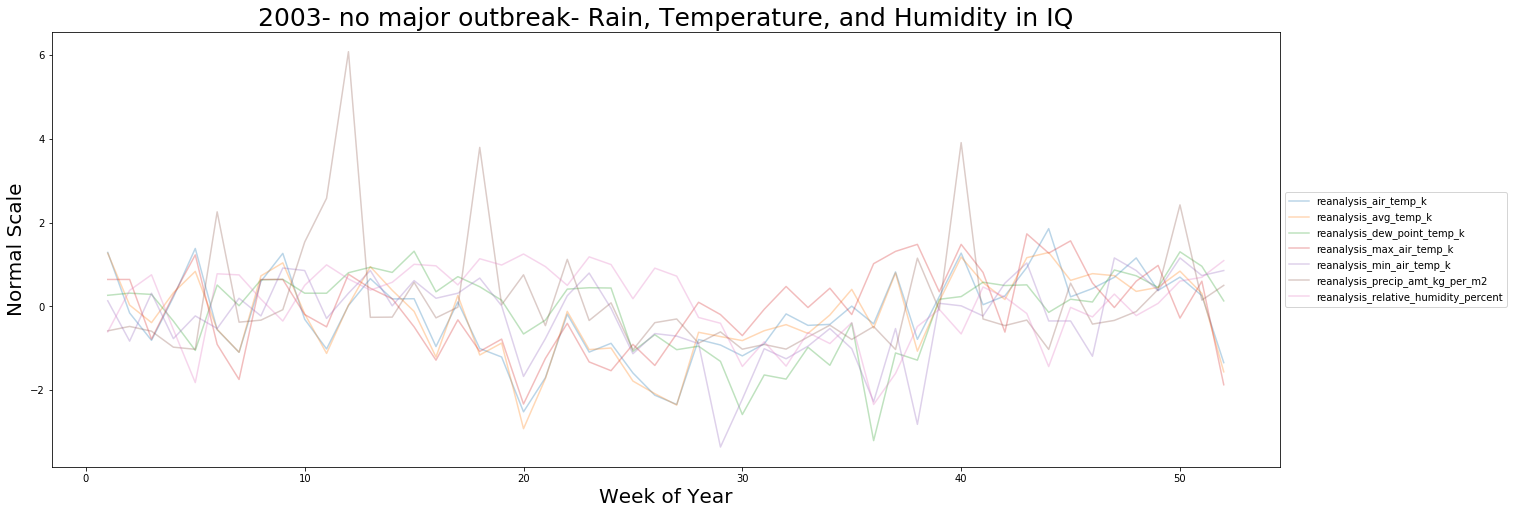

In [24]:
for i in (df_iq_s.columns[1:8]):
    df = df_iq_s[df_iq_s['year']==2003]
    df.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (22, 8))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('2003- no major outbreak- Rain, Temperature, and Humidity in IQ', size = 25)
plt.ylabel('Normal Scale', size = 20)
plt.xlabel('Week of Year', size = 20)



In [ ]:
for i in (df_iq_s.columns[1:8]):
    df = df_iq_s[df_iq_s['year']==2008]
    df.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (22, 8))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('2008- medium outbreak- Rain, Temperature, and Humidity in IQ', size = 25)
plt.ylabel('Normal Scale', size = 20)
plt.xlabel('Week of Year', size = 20)

